<a href="https://colab.research.google.com/github/Deepika8383/ANN_using-_keras/blob/main/AnnUsingKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [2]:
# Checking version of Tensorflow ans Keras
print(f"Tensorflow Version {tf.__version__}")
print(f"Keras Version {tf.keras.__version__}")

Tensorflow Version 2.18.0
Keras Version 3.8.0


In [3]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [5]:
check_list = ['GPU','CPU']

for device in check_list:
  out = tf.config.list_physical_devices(device)
  if len(out) > 0:
    print(f"{device} is available!")
    print(f"Details >> {out}")
  else:
    print(f"{device} isn't available!")

GPU is available!
Details >> [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
CPU is available!
Details >> [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [6]:
mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, Y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [27]:
Y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [14]:
print(f"data type of X_train_full: {X_train_full.dtype},\n shape of X_train_full: {X_train_full.shape}")

data type of X_train_full: uint8,
 shape of X_train_full: (60000, 28, 28)


In [17]:
len(X_test[1][0])

28

In [28]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# scale the test set as well
X_test = X_test / 255.

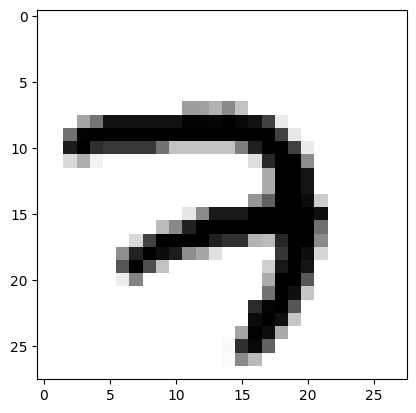

In [29]:
plt.imshow(X_train[0], cmap="binary")
plt.show()

<Axes: >

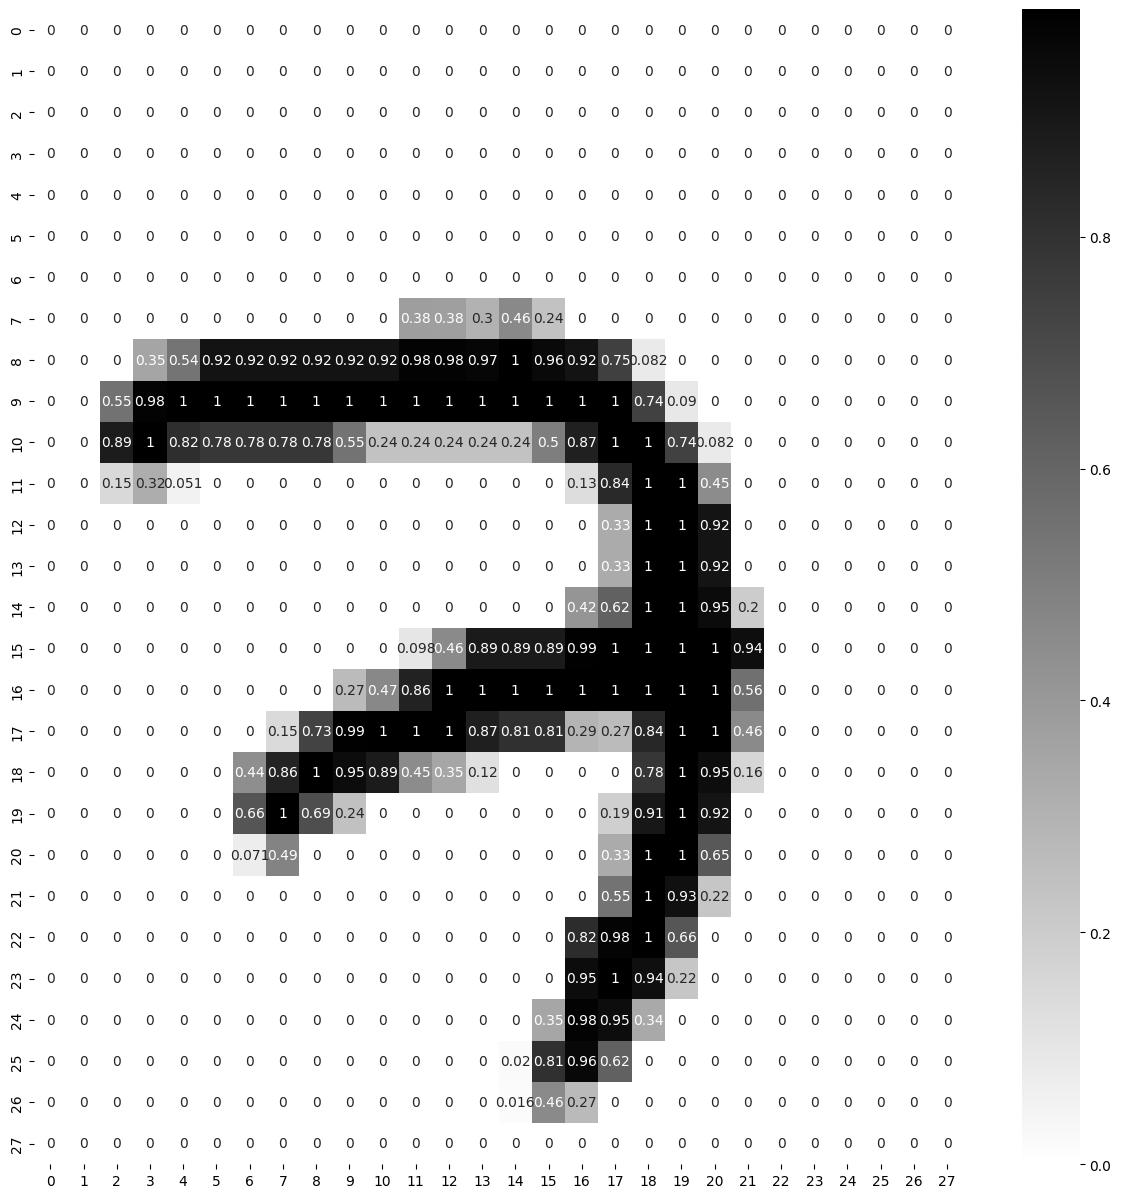

In [30]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot=True, cmap="binary")

In [31]:
28*28

784

In [32]:
# Creating layers of ANN
LAYERS = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

model_clf = tf.keras.models.Sequential(LAYERS)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [33]:
model_clf.layers

[<Flatten name=inputLayer, built=True>,
 <Dense name=hiddenLayer1, built=True>,
 <Dense name=hiddenLayer2, built=True>,
 <Dense name=outputLayer, built=True>]

In [34]:
model_clf.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inputLayer (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hiddenLayer1 (Dense)                 │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hiddenLayer2 (Dense)                 │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ outputLayer (Dense)                  │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [50]:
hidden1.get_weights()[0].size

235200

In [51]:
300*784

235200

In [52]:
weights, biases = hidden1.get_weights()

In [53]:
LOSS_FUNCTION =  tf.losses.sparse_categorical_crossentropy  #"sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = tf.keras.optimizers.SGD(0.02) #"SGD" # or use with custom learning rate=>
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)

In [54]:

EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32)

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7912 - loss: 0.7715 - val_accuracy: 0.9282 - val_loss: 0.2560
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9315 - loss: 0.2381 - val_accuracy: 0.9482 - val_loss: 0.1865
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9484 - loss: 0.1793 - val_accuracy: 0.9624 - val_loss: 0.1449
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9593 - loss: 0.1432 - val_accuracy: 0.9656 - val_loss: 0.1279
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9654 - loss: 0.1180 - val_accuracy: 0.9686 - val_loss: 0.1139
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9717 - loss: 0.0997 - val_accuracy: 0.9724 - val_loss: 0.1019
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9758 - loss: 0.0848 - val_accuracy: 0.9762 - val_loss: 0.0942
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9796 - loss: 0.0740 - 

In [57]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [58]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.876491,0.455189,0.9282,0.255978
1,0.935164,0.224717,0.9482,0.186511
2,0.950545,0.169561,0.9624,0.144937
3,0.960345,0.136648,0.9656,0.127885
4,0.966273,0.114967,0.9686,0.113864
5,0.971764,0.098370,0.9724,0.101900
6,0.975818,0.085504,0.9762,0.094239
7,0.978709,0.074335,0.9752,0.086858
8,0.981273,0.065674,0.9758,0.084977
9,0.983182,0.058715,0.9764,0.081380


<Axes: >

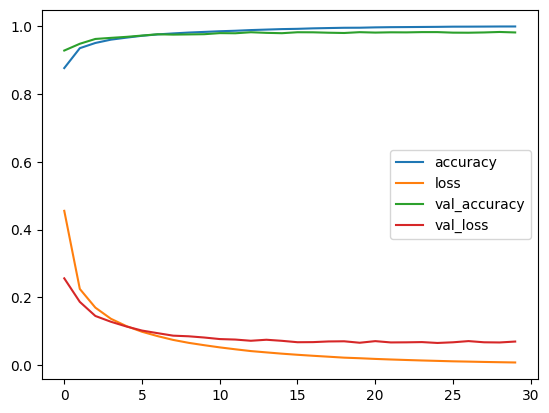

In [59]:
pd.DataFrame(history.history).plot()

In [63]:
model_clf.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9757 - loss: 0.0885


[0.07259403169155121, 0.9790999889373779]

In [67]:
x_new = X_test[5:10]
actual = Y_test[5:10]
actual

array([1, 4, 9, 5, 9], dtype=uint8)

In [68]:
y_prob = model_clf.predict(x_new)
y_prob.round(3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


array([[0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.999, 0.   , 0.   , 0.   , 0.001,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        1.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.865, 0.135, 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        1.   ]], dtype=float32)

In [69]:
y_prob

array([[6.09231199e-09, 9.99567688e-01, 3.73004866e-07, 5.55173358e-07,
        1.20639925e-05, 6.25608454e-10, 1.09586806e-09, 4.12928843e-04,
        6.13065959e-06, 3.79546833e-07],
       [2.95447533e-09, 2.95664719e-08, 2.19318022e-10, 4.68573444e-11,
        9.98973727e-01, 2.28004794e-07, 9.90923343e-09, 2.47659409e-06,
        9.75816569e-04, 4.77967078e-05],
       [2.95454782e-07, 1.71450802e-06, 1.07677351e-05, 2.26768534e-04,
        2.79616306e-05, 1.02764481e-07, 1.52648907e-10, 2.75813636e-05,
        4.58732245e-07, 9.99704301e-01],
       [1.39886367e-07, 3.29181624e-08, 1.87973656e-05, 4.33258514e-08,
        1.52915964e-05, 8.65281820e-01, 1.34517178e-01, 5.31205053e-08,
        1.64186902e-04, 2.33213564e-06],
       [2.51195598e-09, 1.36388665e-12, 1.27814100e-12, 1.31390765e-09,
        1.17646312e-04, 9.89121632e-11, 2.05691465e-14, 1.71741107e-04,
        5.92944332e-07, 9.99710023e-01]], dtype=float32)

In [70]:
y_pred = np.argmax(y_prob, axis = -1)

In [71]:
y_pred

array([1, 4, 9, 5, 9])

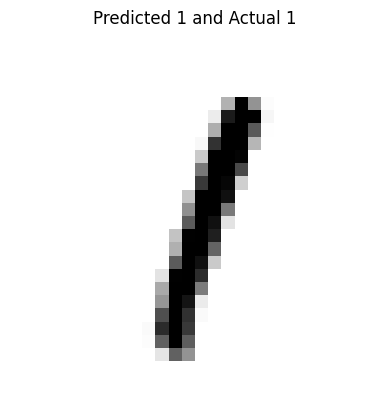

######################


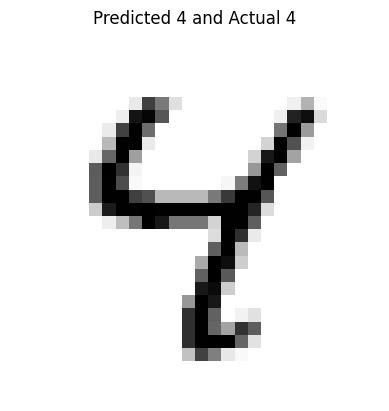

######################


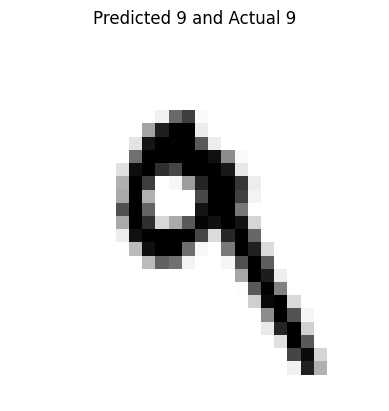

######################


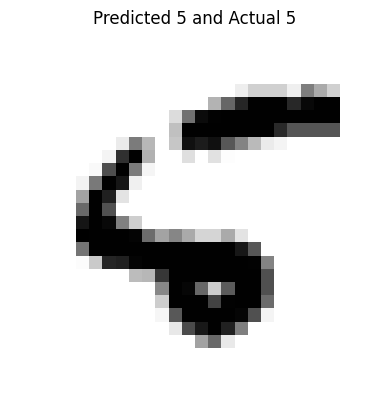

######################


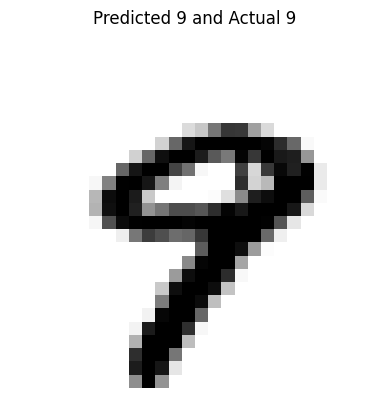

######################


In [72]:
# plot
for data, pred, actual_data in zip(x_new, y_pred, actual):
  plt.imshow(data, cmap="binary")
  plt.title(f"Predicted {pred} and Actual {actual_data}")
  plt.axis("off")
  plt.show()
  print("######################")